In [1]:
from collections import Counter

import pymongo

import nltk
from nltk.tokenize import TweetTokenizer

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# MongoDB connection data
HOST = 'localhost'
PORT = '27017'
DB_NAME = 'trending'

### Connecting to database

In [3]:
db = None
try:
    db_client = pymongo.MongoClient(HOST + ':' + PORT)
    db = db_client[DB_NAME]
    print('Conecction established successfully!')
except pymongo.errors.ConnectionFailure:
    print('Connection cannot be established')

Conecction established successfully!


In [4]:
HISTORY_COL = db['history']

### Analizying trends (hashtags)

In [5]:
counter = Counter()

In [6]:
tweets = HISTORY_COL.find()

In [7]:
tweets.count()

/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


29700

In [8]:
tokenizer = TweetTokenizer(preserve_case = False, reduce_len = True)

In [9]:
for tweet in tweets:
    try:
        terms_hash = [t for t in tokenizer.tokenize(tweet['full_text']) if (t.startswith('#') and len(t) > 1)]
        counter.update(terms_hash)
    except KeyError:
        pass

In [10]:
counter

Counter({'#medellín': 452,
         '#medellinest': 74,
         '#medellin': 819,
         '#guardianesantioquia': 2,
         '#noticias': 39,
         '#quinteroseva': 77,
         '#mty': 1,
         '#monterrey': 1,
         '#mexico': 3,
         '#viernes': 9,
         '#viernesdeganarseguidores': 1,
         '#todosconquintero': 125,
         '#medellinestacambiando': 2566,
         '#petropresid': 180,
         '#depeliculaes': 130,
         '#meetup': 4,
         '#petroeshambre': 36,
         '#alerta': 7,
         '#elpoblado': 10,
         '#robodeoro': 2,
         '#bodegadeoro': 2,
         '#oro': 11,
         '#avenidalasvegas': 4,
         '#cámarasdeseguridad': 1,
         '#calasanz': 1,
         '#montealegrenomeca': 38,
         '#thecerrogroup': 1,
         '#cerrogroupartist': 1,
         '#premiosicono': 1,
         '#latin': 1,
         '#94-63': 1,
         '#voces': 6,
         '#matarife': 211,
         '#medellínestácambiando': 860,
         '#notired360':

In [11]:
trends_df = pd.DataFrame.from_dict(counter, orient = 'index').reset_index()
trends_df.columns = ['Hashtag', 'Frecuencia']
trends_df = trends_df.sort_values(by = ['Frecuencia'], ascending = False)
trends_df = trends_df.head()

In [12]:
trends_df

,Hashtag,Frecuencia
12,#medellinestacambiando,2566
33,#medellínestácambiando,860
2,#medellin,819
0,#medellín,452
107,#pactohistorico,259


[Text(0, 0, '#medellinestacambiando'),
 Text(0, 0, '#medellínestácambiando'),
 Text(0, 0, '#medellin'),
 Text(0, 0, '#medellín'),
 Text(0, 0, '#pactohistorico')]

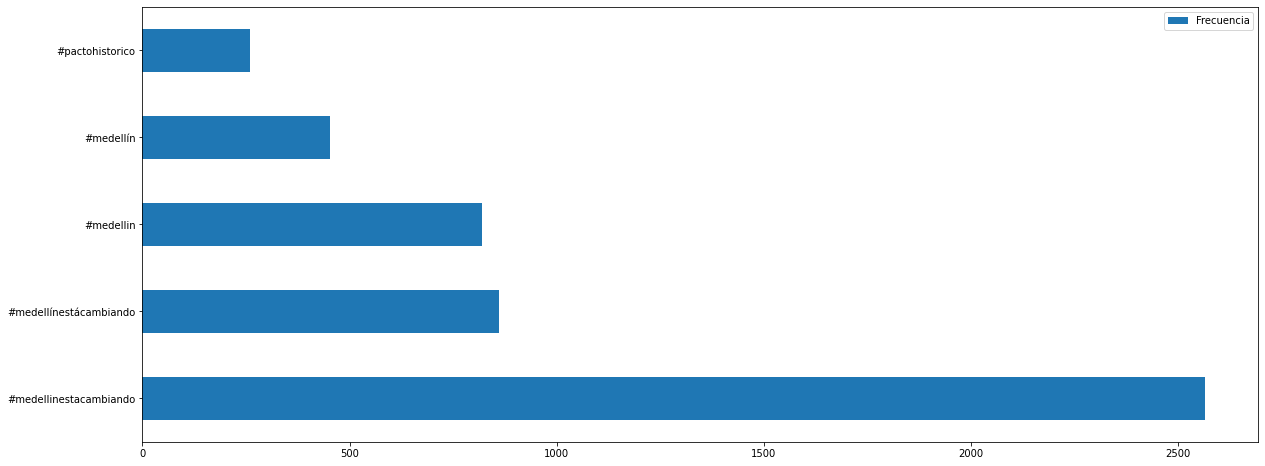

In [13]:
ax = trends_df.plot(kind = 'barh', figsize = (20, 8))
ax.set_yticklabels(trends_df['Hashtag'])

### Creating and using text index

In [14]:
HISTORY_COL.create_index([('full_text', pymongo.TEXT)], default_language = 'spanish')

'full_text_text'

In [15]:
tweets = HISTORY_COL.find({'$text': {'$search': 'quintero'}})

In [16]:
tweets.count()

/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


1401

In [17]:
for tweet in tweets[:5]:
    print(tweet['full_text'].replace('\n', ''))

Yo los amo más, y soy paisa.Ya estamos prevenidos con lo que nos pasó con Quintero, no creo que nos vuelva a pasar.Fuera los izquierdosos de Medellín, acá no tienen cabida aunque Daniel Quintero les abra las puertas de nuestra ciudad..Fueraaaaaaaa. https://t.co/kARidt80UI
#ACTUALIDAD || El alcalde Daniel Quintero anunció una recompensa de 10 millones de pesos para dar con los responsables del frustrado robo en Medellín. Sin embargo, el diseño del cartel es desatinado, pues pareciera que es Quintero a quien hay que buscar.https://t.co/wQ9Mj0LtHR
Ojo,ojo ojo ,si la Registraduría avala las firmas para la revocatoria de Quintero ,es un golpe de mano de lo q se viene para las elecciones ,cómo le pusieron de trabas a la revocatoria de Peñaloza dónde se veían filas firmando , en Medellín no se vio una sola fila,Quintero se Que
@mas_medellin @quediceamigo Quintero mitómano y oportunista.
RT @lazaorbe: Medellín no le pertenece a Quintero, por eso #QuinteroSeVa.


### Analyzing time

In [18]:
tweets = HISTORY_COL.find({}, {'created_at': True})

In [19]:
creation_dates = []
for tweet in tweets:
    try:
        creation_dates.append(tweet['created_at'])
    except:
        pass

(array([234., 265., 262., 228., 216., 256., 267., 215., 203., 251., 245.,
        232., 218., 290., 300., 245., 220., 225., 274., 262., 250., 230.,
        213., 241., 247., 217., 200., 223., 222., 200., 166., 214., 216.,
        200., 240., 205., 196., 199., 217., 171., 180., 229., 159., 201.,
        177., 216., 202., 226., 211., 245., 232., 259., 229., 247., 215.,
        203., 188., 205., 208., 234., 231., 228., 210., 214., 205., 240.,
        243., 266., 344., 373., 371., 337., 411., 412., 442., 416., 378.,
        427., 426., 397., 420., 485., 474., 505., 438., 454., 459., 432.,
        470., 510., 443., 454., 519., 527., 455., 514., 530., 536., 556.,
        507.]),
 array([738099.58658565, 738099.59019722, 738099.5938088 , 738099.59742037,
        738099.60103194, 738099.60464352, 738099.60825509, 738099.61186667,
        738099.61547824, 738099.61908981, 738099.62270139, 738099.62631296,
        738099.62992454, 738099.63353611, 738099.63714769, 738099.64075926,
        738099

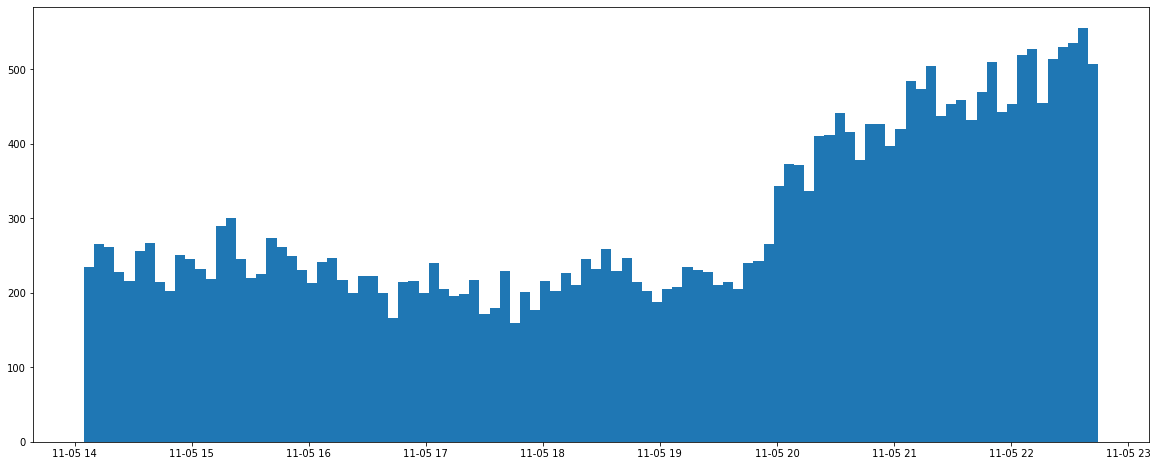

In [20]:
plt.figure(figsize = (20, 8))
plt.hist(creation_dates, bins = 100)